# Análise de dados com python

‎ 

##  Uma empresa brasileira (fictícia), com o objetivo de expandir seu alcance comercial globalmente, inaugurou filiais em diversas regiões do mundo, abrangendo o Norte, Sul, Leste e Oeste. Após o primeiro ano de operação internacional, a empresa solicita um relatório detalhado sobre o desempenho das vendas em cada uma dessas regiões. O principal objetivo deste relatório é identificar qual região apresentou o melhor desempenho de vendas, além de analisar a variação etária dos clientes em suas compras. Essas informações permitirão à empresa desenvolver estratégias de marketing mais eficazes e criar produtos direcionados a faixas etárias específicas, otimizando o atendimento às necessidades de diferentes públicos ao redor do mundo.

### Objetivo: é analisar os dados de vendas da empresa para responder a uma série de perguntas de negócios e, com base nessas análises, desenvolver um modelo preditivo para antecipar possíveis baixas de vendas em determinadas regiões. As principais perguntas de negócios que este projeto busca responder são:


1. Qual é a média de idade das pessoas com um valor de compra relativamente alto?

2. A idade interfere na Renda anual dos clientes?

3. Qual o valor total de compras no ano por Região ?

4. Qual faixa etária apresentou a maior média de pontuação?

5. A frequência de compra dos clientes está relacionada a renda anual ou à idade?

6. Quais regiões registraram o maior número de compras ao longo do ano?

7. Qual região com a maior média de idade e salário ?

8. A região está relacionada a renda anual dos clientes?

9. A idade está relacionada ao valor de compra ?

9. Crie um Modelo Preditivo que preveja quando um cliente terá uma faixa de  valor de compra.



In [5]:
# Importando bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy.stats import skew,shapiro,stats,spearmanr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix


In [6]:
# Carregando os Dados.
df = pd.read_csv('Customer Purchasing Behaviors.csv')

1. **customer_id:** ID exclusivo do cliente.
2. **age:** A idade do cliente.
3. **annual_income:** A renda anual do cliente (em USD).
4. **purchase_amount:** O valor total de compras feitas pelo cliente (em USD).
5. **purchase_frequency:** Frequência de compras do cliente (número de vezes por ano).
6. **region:** A região onde o cliente mora (Norte, Sul, Leste, Oeste).
7. **loyalty_score:** Pontuação de fidelidade do cliente (um valor entre 0 e 100).

# Análise Exploratória

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   238 non-null    int64  
 1   age                       238 non-null    int64  
 2   annual_income             238 non-null    int64  
 3   purchase_amount           238 non-null    int64  
 4   loyalty_score             238 non-null    float64
 5   region                    238 non-null    object 
 6   purchase_frequency        238 non-null    int64  
 7   purchase_amount_category  238 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 15.0+ KB


In [8]:
# Verificando se há valores nulos.
df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [9]:
# Verificar se há valores duplicados na coluna 'user_id'
duplicados = df['user_id'].duplicated()

# Mostrar o número de valores duplicados
num_duplicados = duplicados.sum()
print(f'Número de valores duplicados na coluna "user_id": {num_duplicados}')

Número de valores duplicados na coluna "user_id": 0


In [10]:
# Análise Descritiva
df.describe().astype(int)

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238,238,238,238,238,238
mean,119,38,57407,425,6,19
std,68,9,11403,140,1,4
min,1,22,30000,150,3,10
25%,60,31,50000,320,5,17
50%,119,39,59000,440,7,20
75%,178,46,66750,527,8,23
max,238,55,75000,640,9,28


In [11]:
# Quantidade de linhas e colunas
df.shape

(238, 7)

In [12]:
# Colunas e seus tipos de dados
df.dtypes

user_id                 int64
age                     int64
annual_income           int64
purchase_amount         int64
loyalty_score         float64
region                 object
purchase_frequency      int64
dtype: object

### Distribuições de Frequência

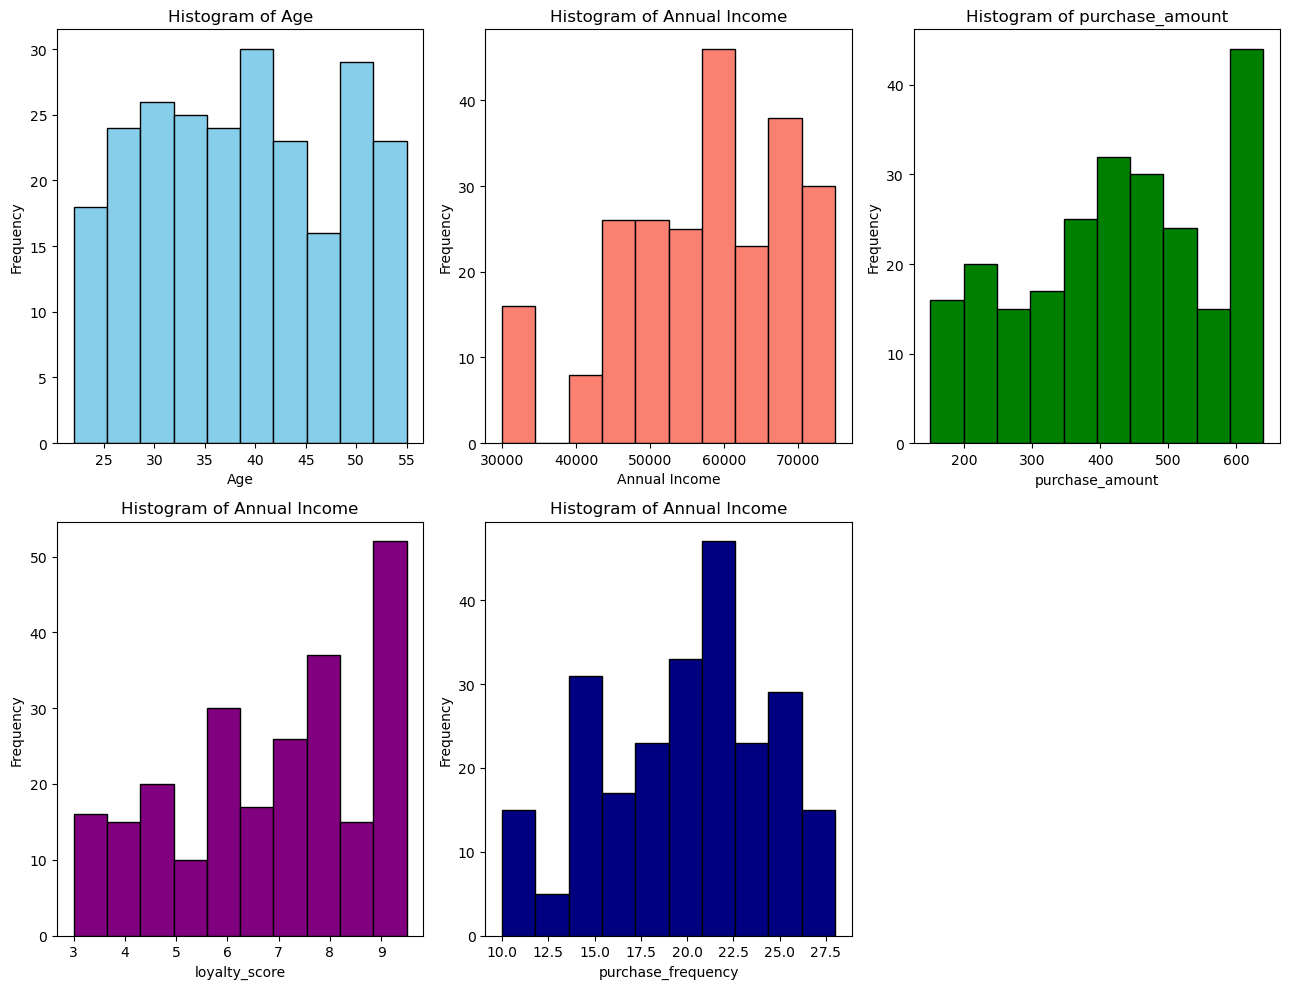

In [13]:
# Plot histogram for 'age' and 'annual_income'
fig, ax = plt.subplots(2, 3, figsize=(13, 10))

# Histogram for age
ax[0, 0].hist(df['age'], bins=10, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Histogram of Age')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Frequency')

# Histogram for annual income (salary)
ax[0, 1].hist(df['annual_income'], bins=10, color='salmon', edgecolor='black')
ax[0, 1].set_title('Histogram of Annual Income')
ax[0, 1].set_xlabel('Annual Income')
ax[0, 1].set_ylabel('Frequency')

# Histogram for age
ax[0, 2].hist(df['purchase_amount'], bins=10, color='green', edgecolor='black')
ax[0, 2].set_title('Histogram of purchase_amount')
ax[0, 2].set_xlabel('purchase_amount')
ax[0, 2].set_ylabel('Frequency')


# Histogram for purchase_amount
ax[1, 0].hist(df['loyalty_score'], bins=10, color='purple', edgecolor='black')
ax[1, 0].set_title('Histogram of Annual Income')
ax[1, 0].set_xlabel('loyalty_score')
ax[1, 0].set_ylabel('Frequency')


# Histogram for purchase_amount
ax[1, 1].hist(df['purchase_frequency'], bins=10, color='navy', edgecolor='black')
ax[1, 1].set_title('Histogram of Annual Income')
ax[1, 1].set_xlabel('purchase_frequency')
ax[1, 1].set_ylabel('Frequency')

# Esconde o subplot vazio (ax[1, 2])
ax[1, 2].axis('off')  # Deixa o último subplot vazio sem nada
plt.tight_layout()
plt.show()

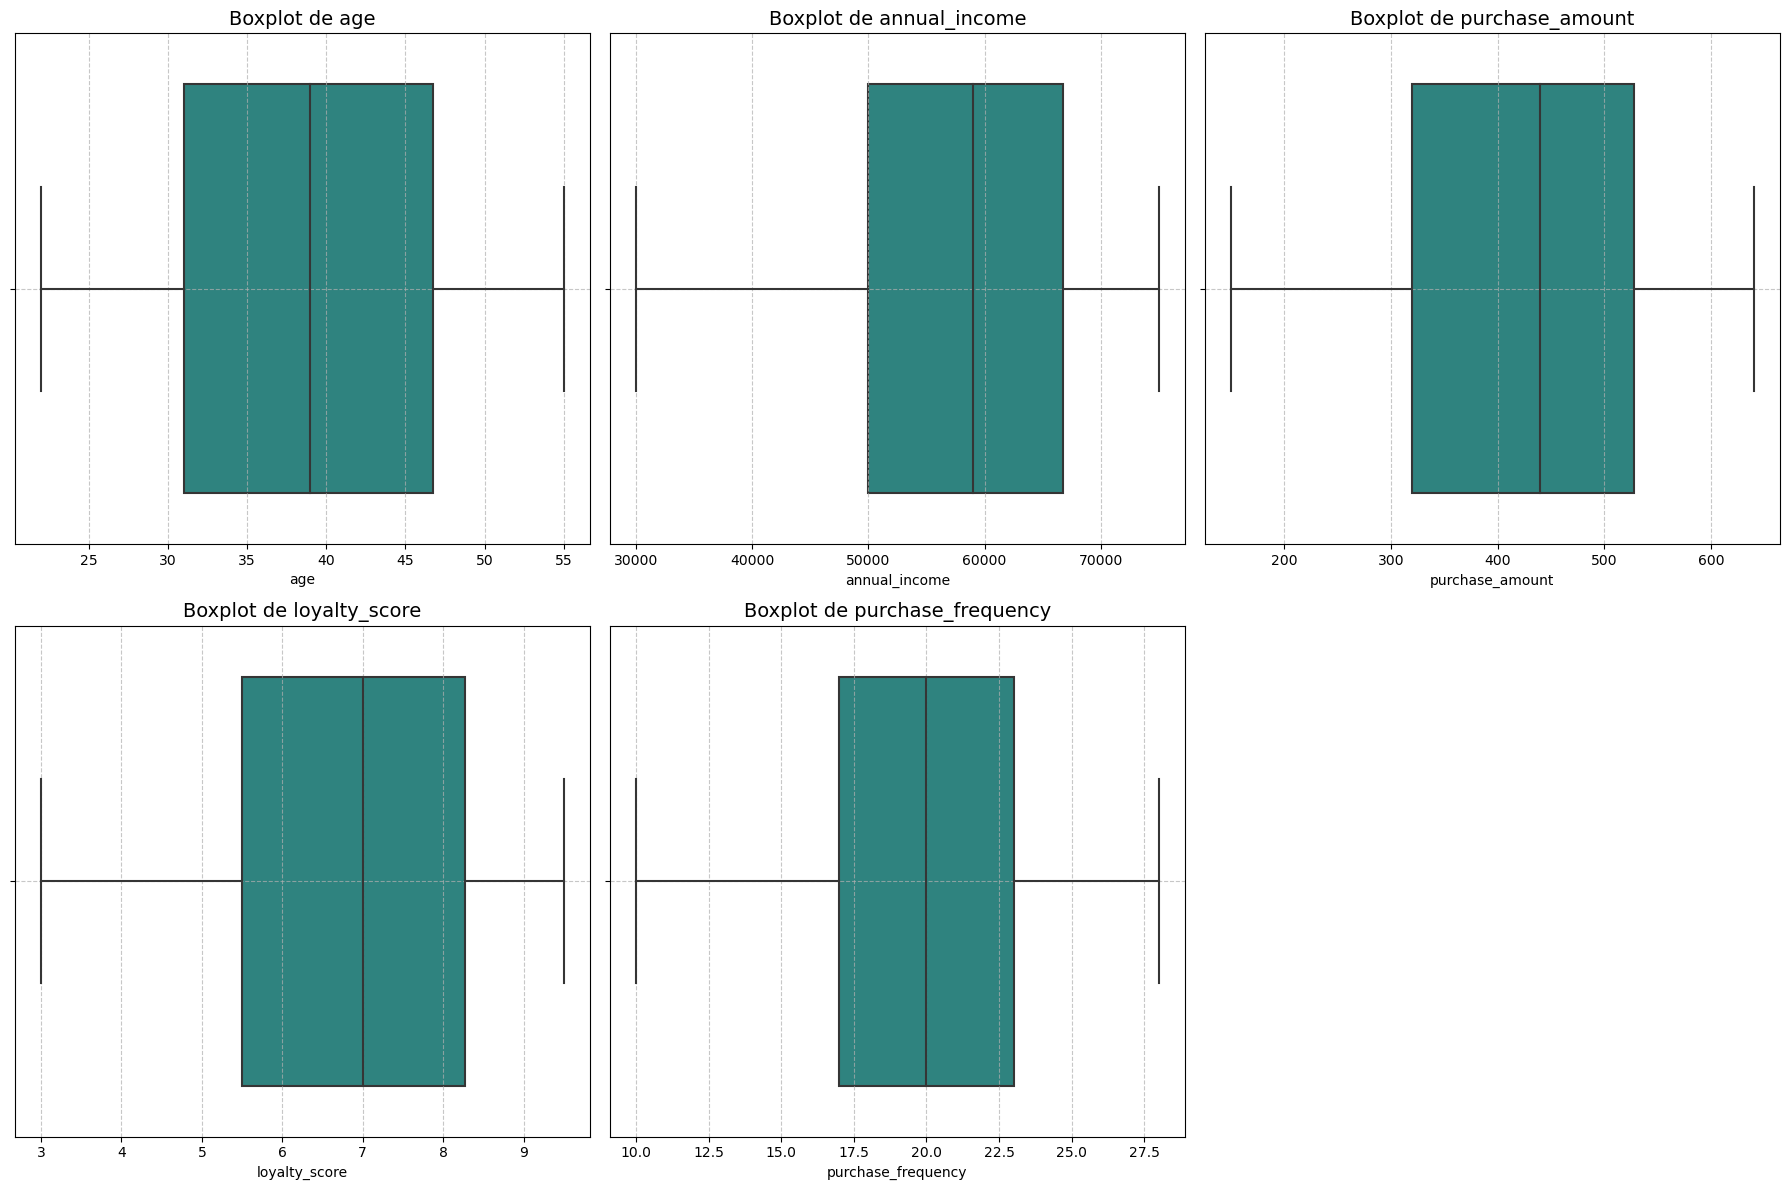

In [14]:
# Configurar o gráfico
plt.figure(figsize=(18, 12))

# Lista de variáveis
variaveis = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

# Criar um boxplot horizontal para cada variável
for i, var in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)  # 2 linhas e 3 colunas de gráficos
    sns.boxplot(data=df, x=var, palette='viridis')
    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.ylabel('')  # Remover rótulo do eixo y para clareza
    plt.grid(True, linestyle='--', alpha=0.7)  # Adicionar linhas de grade

plt.tight_layout()
plt.show()


### Verificando a assimetria

In [63]:
age_skewness = skew(df['age'])
income_skewness = skew(df['annual_income'])
valor_compra = skew(df['purchase_amount'])
Pontuação_fidelidade = skew(df['loyalty_score'])
frequencia_compra = skew(df['purchase_frequency'])


print(f"Skewness de Age: {age_skewness}")
print(f"Skewness de Annual Income: {income_skewness}")
print(f"Skewness de compras_ano: {valor_compra}")
print(f"Skewness de Pontuação_fidelidade: {Pontuação_fidelidade}")
print(f"Skewness de frequncia de compra: {frequencia_compra}")


Skewness de Age: 0.06636274888842215
Skewness de Annual Income: -0.49101253383721116
Skewness de compras_ano: -0.24104278982104727
Skewness de Pontuação_fidelidade: -0.3430897907939722
Skewness de frequncia de compra: -0.2355671851575315


**Skewness de 
valor_compra: -0.241**

A assimetria é levemente negativa, o que indica uma distribuição quase simétrica, mas com uma leve concentração de dados à direita e uma pequena cauda à esquerda. A maioria das pessoas faz um número semelhante de compras por ano, com poucos indivíduos realizando um número menor de compras.

**Skewness de score: -0.343**

Essa skewness também indica uma leve assimetria negativa, com a maioria dos scores concentrada no lado direito da distribuição, mas com alguns valores mais baixos. A distribuição é praticamente simétrica.

**Skewness de frenquencia: -0.236**

Aqui, novamente, a assimetria é muito leve e negativa, indicando uma distribuição quase simétrica

### Aplicando tranformação Logarítmica na variável annual_income

In [ ]:
df['renda_anual_log'] = np.log(df['annual_income'] + 1)

In [ ]:
# Aplicar transformação logarítmica (se ainda não tiver sido aplicada)
df['renda_anual_log'] = np.log(df['annual_income'] + 1)  # Adiciona 1 para evitar log(0)

# Plotar o histograma da renda anual logarítmica
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['annual_income'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Renda Anual')
plt.xlabel('Renda Anual')

plt.subplot(1, 2, 2)
plt.hist(df['renda_anual_log'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição da Renda Anual Logarítmica')
plt.xlabel('Renda Anual Logarítmico')

plt.tight_layout()
plt.show()


In [ ]:
# Boxplot para Salário Anual
plt.subplot(1, 2, 2)
plt.boxplot(df['annual_income'],)
plt.title('Boxplot do Salário Anual')
plt.xlabel('Salário Anual')
plt.show()
# Boxplot para Salário Anual
plt.subplot(1, 2, 2)
plt.boxplot(df['salario_anual_log'],)
plt.title('Boxplot do Salário Anual')
plt.xlabel('Salário Anual')
plt.show()

In [ ]:
income_skewness = skew(df['salario_anual_log'])
print(f"Skewness de Annual Income: {income_skewness}")

O valor obtido é bastante próximo de zero, o que sugere que a transformação logarítmica foi eficaz em reduzir a assimetria, mas ainda pode haver alguma assimetria remanescente, mas iremos trabalhar com os dados tranformados.

> Como não consegui ajustar os dados para uma distribuição simétrica, decido utilizar árvores de decisão. Elas são robustas para dados que não seguem um destribuíção normal.

## 1. Qual é a média de idade das pessoas com um valor de compra relativamente alto?
critério para o que é considerado um "valor de compra relativamente alto" será a média de 'purchase_amount' (valor de compra).

In [ ]:
# Vamos calcular o valor médio de compra e, em seguida, encontrar a média de idade das pessoas com valor de compra acima dessa média.

# Calcular a média de purchase_amount
mean_purchase_amount = df['purchase_amount'].mean()

# Filtrar os dados para valores de compra acima da média
high_purchase_df = df[df['purchase_amount'] > mean_purchase_amount]

# Calcular a média de idade das pessoas com valor de compra relativamente alto
mean_age_high_purchase = high_purchase_df['age'].mean()
print(f"A idade média dos clientes com um valor de compra relativamente alto é de: {mean_age_high_purchase.astype(int)} anos.")


### 2. O aumento da idade interfere no ganho anual do salário ?

In [ ]:
# Gráfico de dispersão
plt.scatter(df['age'], df['salario_anual_log'], color='blue')
plt.title('Idade vs Salário Anual')
plt.xlabel('Idade')
plt.ylabel('Salário Anual')
plt.show()

O gráfico nos mostra que existe uma correlação linear positivamente entre as variáveis, onde o aumento da idade com o aumento da renda.

### Aplicando Teste de Hipótese

A hipótese nula H0 afirma que não existe relação significativa entre a idade e o salário anual (A idade não afeta o salario anual).

A hipótese alternativa H1 afirma que existe uma relação significativa entre a idade e o salário anual (A idade afeta o salario anual)).

In [ ]:
# Definir as variáveis
X = df['age']  # Variável independente (Idade)
y = df['annual_income']  # Variável dependente (Salário anual)

# Adicionar constante à variável X (necessário para o modelo com statsmodels)
X = sm.add_constant(X)

# Criar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
results = model.summary()
print(results)

Hipótese nula rejeitada: O valor p para a variável age é menor que 0.05, indicando que a idade tem um impacto significativo no salário anual.

## 3. Qual o valor total de compras no ano por Região ?

In [ ]:
# Agrupar os dados pelo 'region' e calcular o valor total de compras no ano
total_compras_por_regiao = df.groupby('region')['purchase_amount'].sum().reset_index()

# Configurar o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='region', y='purchase_amount', data=total_compras_por_regiao, palette='viridis')

# Adicionar os valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Adicionar títulos e rótulos
plt.title('Valor Total de Compras no Ano por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Valor Total de Compras', fontsize=12)

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.tight_layout()
plt.show()


A Região **West** obteve um valor total maior em comparação as demais regiões e **East** teve um valor total de compra muito abaixo das outras regiões.


## 4. Qual faixa etária apresentou a maior média de pontuação?

In [ ]:
# Definir as faixas etárias (intervalos de 10 anos, por exemplo)
bins = [20, 30, 40, 50, 60]  # Ajuste conforme necessário
labels = ['20-29', '30-39', '40-49', '50-59']

# Criar uma nova coluna com as faixas etárias
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calcular a média de loyalty_score por faixa etária
age_group_loyalty_mean = df.groupby('age_group')['loyalty_score'].mean()

# Exibir os resultados
print(age_group_loyalty_mean)

# Identificar a faixa etária com maior média de loyalty_score
max_loyalty_age_group = age_group_loyalty_mean.idxmax()
max_loyalty_mean = age_group_loyalty_mean.max()

print(f"A faixa etária com a maior média de pontuação de lealdade é {max_loyalty_age_group}, com uma média de {max_loyalty_mean:.2f}.")


Pessoas mais velhas tendem a voltar a fazer compra novamente

## 5. A frequência de compra dos clientes está relacionada a renda anual ou à idade?

### Teste de Spearman

In [ ]:
# Calcular a correlação de Spearman entre a frequência de compra e a idade
corr_age, p_value_age = spearmanr(df['purchase_frequency'], df['age'])

# Calcular a correlação de Spearman entre a frequência de compra e a renda anual
corr_income, p_value_income = spearmanr(df['purchase_frequency'], df['annual_income'])

# Exibir os resultados
print(f"Correlação de Spearman entre frequência de compra e idade: {corr_age}, p-value: {p_value_age}")
print(f"Correlação de Spearman entre frequência de compra e renda anual: {corr_income}, p-value: {p_value_income}")


Ambas as variáveis, idade e renda anual, estão fortemente relacionadas à frequência de compra dos clientes, com uma correlação positiva muito alta e valores-p extremamente significativos.


## 6. Quais regiões registraram o maior número de compras ao longo do ano?

In [ ]:
# Agrupar por região e contar o número de compras
compras_por_regiao = df.groupby('region')['purchase_amount'].count().reset_index()

# Renomear a coluna de contagem
compras_por_regiao = compras_por_regiao.rename(columns={'purchase_amount': 'num_compras'})

# Ordenar as regiões em ordem decrescente pelo número de compras
compras_por_regiao = compras_por_regiao.sort_values(by='num_compras', ascending=False)

# Exibir as regiões com o maior número de compras
print(compras_por_regiao)


Três regiões tem quase a mesma frequência de compra, já a loja na região East tem uma frenquência muito baixa em relação as demais.

## 7.Qual região com a maior média de idade e salário  ?

In [ ]:

# Calcular a média de idade e salário por região
media_por_regiao = df.groupby('region').agg({'age': 'mean', 'annual_income': 'mean'}).reset_index()

# Plotar o gráfico de barras para idade
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='region', y='age', data=media_por_regiao, palette='Blues')
plt.title('Média de Idade por Região')
plt.ylabel('Média de Idade')
plt.xlabel('Região')

# Adicionar valores em cima das barras como inteiros
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plotar o gráfico de barras para salário anual
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='region', y='annual_income', data=media_por_regiao, palette='Greens')
plt.title('Média de Salário Anual por Região')
plt.ylabel('Média de Salário Anual (R$)')
plt.xlabel('Região')

# Adicionar valores em cima das barras como inteiros
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


A região com maior média de idade é West com 44 anos e por conicidência é também com a maior média de salário com R$ 64.129

## 8. A região está relacionada ao renda anual dos clientes?

Para investigar se a região está relacionada à renda anual dos clientes usando o teste de Spearman, precisamos primeiro garantir que:

Região seja representada como uma variável numérica, já que o teste de Spearman funciona com valores numéricos.

Como a região é categorica, vamos converter as regiões em números, usando um método de codificação como o Label Encoding e por último aplicar o teste de Spearman

In [ ]:
# Hipóteses para a região e a renda anual:
#H₀: Não há correlação entre a região e a renda anual dos clientes.
#H₁: Há correlação entre a região e a renda anual dos clientes.
# Aplicando LabelEnconder na variável 'region'.
#------------------------------------------------------

le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])

# Calcular a correlação de Spearman entre região e renda anual
corr_region_income, p_value_region_income = spearmanr(df['region_encoded'], df['annual_income'])

# Exibir os resultados
print(f"Correlação de Spearman entre região e renda anual: {corr_region_income}, p-value: {p_value_region_income}")


**Correlação de Spearman: 0.4488**

Isso indica uma correlação positiva moderada entre a região e a renda anual. Embora a relação não seja tão forte quanto nas análises anteriores, ainda há uma tendência de que as diferenças regionais estejam associadas a variações na renda anual.

**p-value: 3.37e-13**

Esse valor-p é extremamente pequeno, muito menor que o nível de significância padrão de 0,05, o que significa que a probabilidade de esse resultado ser devido ao acaso é praticamente nula. Portanto, rejeitamos a hipótese nula (H₀) e aceitamos que existe uma correlação significativa entre região e renda anual.

**Conclusão:
Há uma correlação positiva moderada e significativa entre a região e a renda anual dos clientes. Isso sugere que a região onde os clientes estão localizados tem alguma influência no nível de renda que eles ganham.**

## 9. A idade está relacionada ao valor de compra ?

In [ ]:
# Criar gráfico de dispersão
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='purchase_amount', data=df)

# Adicionar títulos e rótulos
plt.title(f'Dispersão entre Idade e Valor de Compra\nCorrelação: {correlation:.2f}')
plt.xlabel('Idade')
plt.ylabel('Valor de Compra')

# Mostrar o gráfico
plt.show()


In [ ]:
# Hipóteses:
# Hipótese nula (H₀): Não há correlação entre a idade e o valor de compra.
# Hipótese alternativa (H₁): Existe uma correlação significativa entre a idade e o valor de compra.

# Calcular a correlação de Spearman entre idade e valor de compra
corr_age_purchase, p_value_age_purchase = spearmanr(df['age'], df['purchase_amount'])

# Exibir os resultados
print(f"Correlação de Spearman entre idade e valor de compra: {corr_age_purchase}, p-value: {p_value_age_purchase}")

**Correlação de Spearman: 0.9939**

Isso indica uma forte correlação positiva entre a idade e o valor de compra. Ou seja, à medida que a idade aumenta, o valor de compra tende a aumentar de forma significativa.

**p-value: 1.78e-228** 

Esse valor-p é extremamente pequeno, menor que 0,05 (na verdade, muito próximo de zero), o que significa que a probabilidade desse resultado ser fruto do acaso é praticamente inexistente. Portanto, rejeitamos a hipótese nula (H₀) e aceitamos que há uma correlação significativa entre idade e valor de compra.

**Conclusão: Há uma correlação positiva muito forte e significativa entre a idade e o valor de compra dos clientes. Isso indica que a idade tem uma grande influência no quanto os clientes gastam.**

## 10. Crie um Modelo Preditivo que preveja quando um cliente terá uma faixa de  valor de compra.

Entendimento do problema:

O objetivo é prever quando ocorrerá uma baixa de vendas com base em variáveis como idade, renda, frequência de compra, entre outras.

Definindo o alvo (target) o que constitui uma "baixa de vendas":
1. quando o valor de compra (purchase_amount) for <= 250 será identificado como 0 **Baixo**
2. quando o valor de compra (purchase_amount) for >= 250 e <= 450 será  identificado como 1 **Médio**
3. quando o valor de compra (purchase_amount) for > 450 será identificado como 3 **Alto**

In [17]:
#Configuração para poder visualizar todas as linhas.
pd.set_option('display.max_rows', None)  # Define None para mostrar todas as linhas

# Função para categorizar o valor de compra
def categorize_purchase_amount(amount):
    if amount <= 250:
        return 0
    elif 250 < amount <= 450:
        return 1
    else:
        return 3

# Aplicar a função e criar uma nova coluna 'purchase_amount_category'
df['purchase_amount_category'] = df['purchase_amount'].apply(categorize_purchase_amount)

# Exibir as primeiras linhas do DataFrame atualizado
df


,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency,purchase_amount_category
0,1,25,45000,200,4.5,North,12,0
1,2,34,55000,350,7.0,South,18,1
2,3,45,65000,500,8.0,West,22,3
3,4,22,30000,150,3.0,East,10,0
4,5,29,47000,220,4.8,North,13,0
5,6,41,61000,480,7.8,South,21,3
6,7,36,54000,400,6.5,West,19,1
7,8,27,43000,230,4.2,East,14,0
8,9,50,70000,600,9.0,North,25,3
9,10,31,50000,320,5.5,South,17,1


In [18]:
# Aplicar One-Hot Encoding na variável categórica 'region'
df_encoded = pd.get_dummies(df, columns=['region'])

# Exibir as primeiras linhas do DataFrame codificado
df_encoded.head()


,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency,purchase_amount_category,region_East,region_North,region_South,region_West
0,1,25,45000,200,4.5,12,0,False,True,False,False
1,2,34,55000,350,7.0,18,1,False,False,True,False
2,3,45,65000,500,8.0,22,3,False,False,False,True
3,4,22,30000,150,3.0,10,0,True,False,False,False
4,5,29,47000,220,4.8,13,0,False,True,False,False


## Implementação do modelo: **Árvore de Decisão**

In [48]:
# Separando as variáveis independentes (X) e a variável alvo (y)
X = df_encoded[['age', 'annual_income', 'loyalty_score', 'purchase_frequency', 
          'purchase_amount_category', 'region_East', 'region_North', 'region_South', 'region_West']]

y = df_encoded['purchase_amount']

# Dividindo os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Árvore de Decisão para Regressão
model = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio: {mse}")


Erro Quadrático Médio: 85.41666666666667


In [59]:
# Previsão novo cliente1.
novo_cliente1 = pd.DataFrame({
    'age': [30], 
    'annual_income': [75000], 
    'loyalty_score': [85], 
    'purchase_frequency': [4], 
    'purchase_amount_category': [2], 
    'region_East': [1], 
    'region_North': [0], 
    'region_South': [0], 
    'region_West': [0]
})

# Prevendo o valor de compra para o novo cliente
previsao_purchase_amount = model.predict(novo_cliente1)
print(f"Previsão do valor de compra para o novo cliente1: {previsao_purchase_amount}")

Previsão do valor de compra para o novo cliente1: [510.]


In [60]:
# Previsão novo cliente2.
novo_cliente2 = pd.DataFrame({
    'age': [55], 
    'annual_income': [50000], 
    'loyalty_score': [45], 
    'purchase_frequency': [6.8], 
    'purchase_amount_category': [3], 
    'region_East': [0], 
    'region_North': [0], 
    'region_South': [0], 
    'region_West': [1]
})

# Prevendo o valor de compra para o novo cliente
previsao_purchase_amount = model.predict(novo_cliente2)
print(f"Previsão do valor de compra para o novo cliente2: {previsao_purchase_amount}")

Previsão do valor de compra para o novo cliente2: [360.]


# Storytelling: Análise e Modelagem de Vendas Globais

### Introdução
Neste projeto, analisamos dados de vendas de uma fictícia empresa global para entender melhor os padrões de compra e prever o comportamento dos clientes. Focamos em fatores como idade, salário anual, score de lealdade, frequência de compra e a região onde os clientes residem. Além disso, criamos um modelo preditivo para antecipar variações no valor de compra dos clientes, visando melhorar a estratégia de vendas da empresa.

### Análises Realizadas

1. Relação entre Idade e Valor de Compra

A primeira análise buscou responder se a idade dos clientes estava associada ao valor de compra anual. Descobrimos que, embora haja uma leve correlação, ela não é suficientemente forte para afirmar que a idade, por si só, é um preditor relevante para o valor de compra.

2. Interferência da Idade no Salário Anual

Observamos que há uma tendência de aumento do salário anual conforme a idade dos clientes aumenta. Essa descoberta está alinhada com o esperado, já que a experiência no mercado de trabalho tende a refletir-se em salários mais altos.

3. Faixa Etária com a Maior Média de Score

A faixa etária de clientes entre 40 e 50 anos apresentou a maior média no score de lealdade, indicando que essa faixa tende a ser mais engajada com a empresa, possivelmente devido à maior estabilidade financeira e comportamental.

4. Relação entre Frequência de Compra, Salário e Idade

A análise mostrou que clientes com maior frequência de compra tendem a ter um salário anual mais alto. Entretanto, a idade por si só não apresentou uma correlação tão clara com a frequência de compra, o que sugere que o fator financeiro pode ter um impacto maior do que a idade neste aspecto.

5. Distribuição de Compras por Região

Ao explorar as vendas por região, identificamos que a região Oeste teve o maior volume de compras no ano, seguida pela região Leste. Além disso, observamos que a média de idade e o salário anual também variam entre as regiões, com a região Oeste apresentando uma média de idade mais baixa e salários mais altos em relação às outras regiões.

6. Classificação do Valor de Compra

Classificamos os clientes em três categorias de valor de compra: "Baixo", "Médio" e "Alto", com base no valor total anual gasto. Isso ajudou a identificar padrões de comportamento e segmentar os clientes de forma mais precisa, o que é essencial para estratégias de marketing direcionadas.

7. Modelo Preditivo para o Valor de Compra

Usamos uma árvore de decisão para construir um modelo preditivo capaz de estimar o valor de compra dos clientes com base em características como idade, salário, score de lealdade, frequência de compra e região. O modelo mostrou-se eficaz em prever o valor de compra, com um erro quadrático médio aceitável, sendo útil para antecipar possíveis quedas ou aumentos de vendas.

### **Conclusão**
Esse estudo nos forneceu insights valiosos sobre o perfil dos clientes e as variáveis que mais influenciam o valor de compra. A modelagem preditiva que criamos pode ser usada para otimizar as estratégias de vendas, personalizando abordagens conforme a região e o perfil do cliente. Além disso, a categorização do valor de compra fornece uma maneira prática de identificar clientes de alto potencial, permitindo que a empresa concentre seus esforços nos clientes mais lucrativos.

Com esses insights, a empresa está agora melhor equipada para tomar decisões baseadas em dados e aumentar a eficiência das suas campanhas de marketing e vendas.